<a href="https://colab.research.google.com/github/william89813042/colab/blob/main/%E3%80%8C5_3_1%E4%BD%BF%E7%94%A8%E6%B1%BA%E7%AD%96%E6%A8%B9%E5%88%86%E9%A1%9E%E7%97%85%E4%BA%BA%E7%94%A8%E8%97%A5_ipynb%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 使用決策樹分類病人用藥

## 匯入資料與分析資料

In [ ]:
import numpy as np    #匯入函式庫
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
df = pd.read_csv('https://raw.githubusercontent.com/jang0820/csv/main/Kaggle/drug200.csv')  #讀取drug200.csv轉換成DataFrame儲存到變數df。
print(df.head())    #使用函式head顯示變數df的前五筆資料。

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


## 檢查資料

In [ ]:
print(df.isnull().values.sum())  #使用函式isnull檢查資料是否有空值，如果欄位有空值就會回傳True，轉換成數值1，加總結果就會是空值個數。
print("資料筆數:", df.shape)      #使用shape顯示資料的筆數，屬性dtypes顯示每個欄位的資料型別，函式keys顯示欄位名稱。
print("資料的資料型別:", df.dtypes)
print("資料的欄位名稱，分別是:", df.keys())
print("第一筆的資料內容:", df.iloc[0,::])   #iloc顯示指定範圍的資料內容，使用[]顯示指定欄位的資料內容。
print("第一筆的預測目標:",df['Drug'][0])

0
資料筆數: (200, 6)
資料的資料型別: Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object
資料的欄位名稱，分別是: Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
第一筆的資料內容: Age                23
Sex                 F
BP               HIGH
Cholesterol      HIGH
Na_to_K        25.355
Drug            drugY
Name: 0, dtype: object
第一筆的預測目標: drugY


# 資料的前處理

In [ ]:
print(np.unique(df['Sex']))   #使用np.unique不重複取出資料集df欄位Sex、BP、Cholesterol、Drug的可能值。
print(np.unique(df['BP']))
print(np.unique(df['Cholesterol']))
print(np.unique(df['Drug']))
df2 = df                    #變數df2參考到df。

#變數LE_sex為LabelEncoder物件，將字串轉換成數字，變數LE_sex負責轉換F與M，將資料集df2的欄位Sex的F與M轉換成數字0與1。
LE_sex = preprocessing.LabelEncoder() 
LE_sex.fit(['F','M'])
df2['Sex'] = LE_sex.transform(df2['Sex'])

#變數LE_bp為LabelEncoder物件，將字串轉換成數字，變數LE_bp負責轉換NORMAL、HIGH、LOW，將資料集df2的欄位BP的NORMAL、HIGH、LOW轉換成數字0與2。 
LE_bp = preprocessing.LabelEncoder()    
LE_bp.fit(['NORMAL', 'HIGH', 'LOW'])
df2['BP'] = LE_bp.transform(df2['BP']) 
#變數LE_cho為LabelEncoder物件，將字串轉換成數字，變數LE_cho負責轉換NORMAL、HIGH，將資料集df2的欄位Cholesterol的NORMAL、HIGH轉換成數字0與1。
LE_cho = preprocessing.LabelEncoder()
LE_cho.fit(['NORMAL', 'HIGH'])
df2['Cholesterol'] = LE_cho.transform(df2['Cholesterol']) 
print(df2.head()) #使用函式head顯示變數df2的前五筆資料。

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['drugA' 'drugB' 'drugC' 'drugX' 'drugY']
   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  drugY


## 分割訓練資料與測試資料

In [ ]:
#設定變數y為資料集df2欄位Drug，設定變數X為資料集df2移除欄位Drug。
y=df2['Drug']
X=df2.drop(['Drug'],axis=1)
#使用函式train_test_split，以變數X為獨立變數，變數y為相依變數，隨機挑選出訓練集與測試集，原始資料的百分之70為訓練集，剩餘百分之30為測試集，設定random_state為42。
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
#使用shape顯示訓練資料與測試資料的筆數。
print("訓練集的維度大小:   ", train_X.shape)
print("測試集的維度大小:   ", test_X.shape)

訓練集的維度大小:    (140, 5)
測試集的維度大小:    (60, 5)


## 使用決策樹進行分類

In [ ]:
#建立決策樹模型，設定決策樹的標準為entropy，設定決策樹的最大葉節點個數為5。
model = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5)
#輸入訓練資料到模型進行訓練
model.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)

## 評估模型

In [ ]:
#以test_X為輸入，使用函式predict進行預測，變數pred_y參考到此結果，使用函式metrics.accuracy_score計算test_y與pred_y的正確率。
pred_y = model.predict(test_X)
print("正確率為", metrics.accuracy_score(test_y, pred_y))

#使用混淆矩陣分析test_y與pred_y，發現有6個輸入辨別錯誤。
cm = confusion_matrix(test_y, pred_y)
print(cm)

正確率為 0.9
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]


## 調整決策樹的max_leaf_nodes找出最高正確率

In [ ]:
def tree(num):  #定義函式tree，輸入參數num，建立決策樹模型，設定決策樹的標準為entropy，
    model = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = num)#設定決策樹的最大葉節點個數為num
    model.fit(train_X, train_y) #輸入訓練資料到模型進行訓練
    pred_y = model.predict(test_X) #使用函式predict進行預測，以test_X為輸入，變數pred_y參考到此結果
    print("正確率為", metrics.accuracy_score(test_y, pred_y)) #使用函式metrics.accuracy_score計算test_y與pred_y的正確率

#使用for迴圈，迴圈變數i由2到9，每次遞增1，將迴圈變數i代入函式tree，使用迴圈變數i每次設定決策樹的最大葉節點個數，再進行訓練模型與評估模型，找出正確率最高的最大葉節點個數。
for i in range(2,10):
    tree(i)

正確率為 0.7333333333333333
正確率為 0.85
正確率為 0.9
正確率為 0.9
正確率為 1.0
正確率為 1.0
正確率為 1.0
正確率為 1.0


## 繪製決策樹

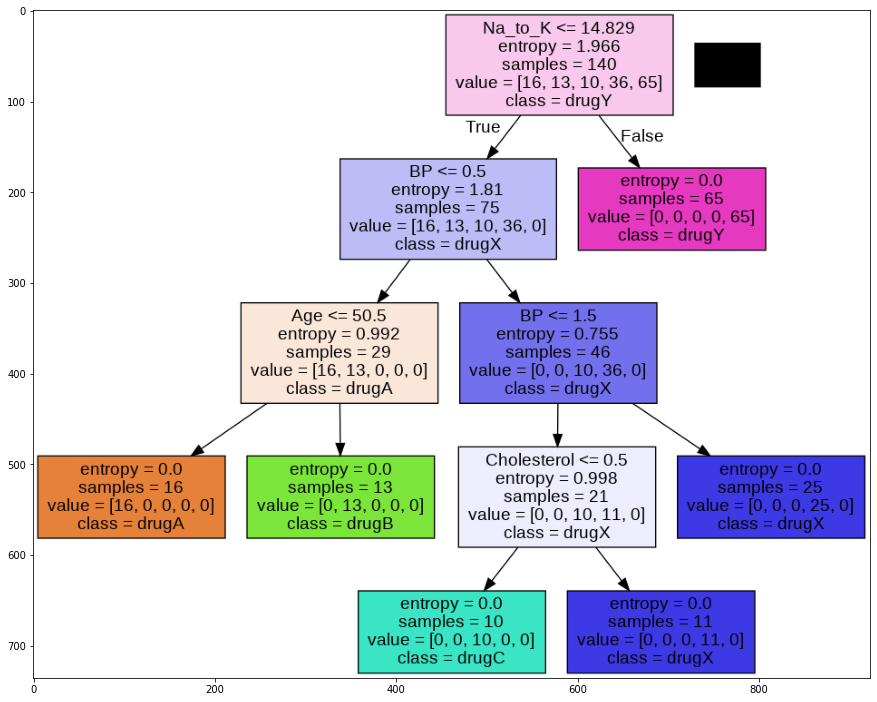

In [ ]:
#匯入函式庫。
from  io import StringIO
from sklearn import tree
import pydotplus
import matplotlib.image as image
import matplotlib.pyplot as plt

#建立決策樹模型，設定決策樹的標準為entropy，設定決策樹的最大葉節點個數為6。
model = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 6)

#輸入訓練資料到模型進行訓練。
model.fit(train_X, train_y)
#使用函式predict進行預測，以test_X為輸入，變數pred_y參考到此結果。
pred_y = model.predict(test_X)
io = StringIO()   #設定變數io為StringIO。

filename = "決策樹.png" #設定filename
column_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'] #設定column_names
#使用函式export_graphviz匯出決策樹圖到變數io
tree.export_graphviz(model,feature_names=column_names, out_file=io, class_names= np.unique(train_y), filled=True)  
#用函式graph_from_dot_data從變數io載入圖片到變數gra。
gra = pydotplus.graph_from_dot_data(io.getvalue())  
gra.write_png(filename) #使用函式write_png將變數gra的圖片寫到檔案filename
img = image.imread(filename)  #使用函式imread讀取圖片檔案filename到變數img。
plt.figure(figsize=(15, 30))  #設定物件fig的圖片大小為寬度15像素，高度30像素，顯示img到螢幕上。
plt.imshow(img)